# **Import necessary libraries**

In [3]:
import numpy as np
import math
from numpy import matrix
from numpy import linalg
from numpy.polynomial import polynomial as p
import time
from matplotlib import pyplot as plt
import random

# **Useful function**

In [4]:
def find_q(n):
    result = 2*n + 1 #Initial value
    
    while True:
        prime = 0
        for i in range(2, result):
            if result%i == 0:
                prime = 1
                break
            else:
                pass
        
        if prime == 1:
            result += 2*n
            continue
        else:
            break
            
    return result

def find_psi(q, n):
    generator = 0
    test_value = 2
    while generator == 0:
        if (test_value**(2*n))%q != 1: #Does test_value is a 2n root of unity?
            test_value += 1
            continue
        else:
            pass #Yes, test_value is a 2n root of unity.
            
        test = 0 #Test for 2, 3, ..., 2n-1
        for i in range(2, 2*n):
            if (test_value**i)%q == 1:
                test = 1 #test_value is not the 2n-primitive root of unity
                continue
            else:
                pass
            
        if test == 1: #For doing next test
            test_value += 1
            continue
        else:
            pass
        
        generator = test_value
            
    return generator

def modMatInv(A,p):       # Finds the inverse of matrix A mod p
  n=len(A)
  A=matrix(A)
  adj=np.zeros(shape=(n,n))
  for i in range(0,n):
    for j in range(0,n):
      adj[i][j]=((-1)**(i+j)*int(round(linalg.det(minor(A,j,i)))))%p
  return (modInv(int(round(linalg.det(A))),p)*adj)%p

def modInv(a,p):          # Finds the inverse of a mod p, if it exists
  for i in range(1,p):
    if (i*a)%p==1:
      return i
  raise ValueError(str(a)+" has no inverse mod "+str(p))

def minor(A,i,j):    # Return matrix A with the ith row and jth column deleted
  A=np.array(A)
  minor=np.zeros(shape=(len(A)-1,len(A)-1))
  p=0
  for s in range(0,len(minor)):
    if p==i:
      p=p+1
    q=0
    for t in range(0,len(minor)):
      if q==j:
        q=q+1
      minor[s][t]=A[p][q]
      q=q+1
    p=p+1
  return minor

def horner(poly, n, a): #Horner's method
    #Input data: poly(list), n(integer), a(complex number)
    #n is the length of poly, poly is a polynomial 
    #Evaluating polynomial poly(a)
    result = poly[0]
    for i in range(1, n):
        result = result*a+poly[i]
    return result

def mmv(A, b): #Multiplication between matrix and vector
    #Input data: A(list of lists), b(list)
    #A is a nxn matrix and b is a nx1 vector
    result = []
    n = len(b)
    for i in range(0, n):
        element = 0
        for j in range(0, n):
            element += A[i][j]*b[j]
        result.append(element)
    return result

def Bezout(a, b):
    #Input data: a(ndarray), b(ndarray)
    #a and b are polynomials
    #Find Bezout coefficients mod x^N + 1
    
    #Initial settings
    tmp = np.polydiv(a, b)
    if (tmp[1] == np.array([0])).all():
        return np.array([0])
    else:
        recur = [[a, np.array([0]), np.array([1]), np.array([0])],[b, tmp[0], np.array([0]), np.array([1])], [tmp[1], np.array([0]), np.array([0]), np.array([0])]]
        
        #Iterative part
        while len(recur[2][0]) != 1 or recur[2][0][0] > 1.0e-10:
            new_recur = [[np.array([0]), np.array([0]), np.array([0]), np.array([0])]]*3
            new_recur[0] = recur[1]
            new_recur[1] = recur[2]
            tmp1 = np.polydiv(new_recur[0][0], new_recur[1][0])
            new_recur[1][1] = tmp1[0]
            new_recur[2][0] = tmp1[1]
            new_recur[1][2] = np.polysub(recur[0][2], np.polymul(recur[1][1], recur[1][2]))
            new_recur[1][3] = np.polysub(recur[0][3], np.polymul(recur[1][1], recur[1][3]))
            
            recur = new_recur
        return np.polydiv(recur[1][2], recur[1][0])[0], np.polydiv(recur[1][3], recur[1][0])[0]
    
    
    
def Bezout_num(a, b):
    #Input data: a(int), b(int)
    #a and b are integers
    #Find Bezout coefficients 
    
    #Initial settings
    if a%b == 0:
        return 0
    else:
        recur = [[a, 0, 1, 0], [b, a//b, 0, 1], [a%b, 0, 0, 0]]
        
        #Iterative part
        while recur[2][0] != 0:
            new_recur = [[0, 0, 0, 0]]*3
            new_recur[0] = recur[1]
            new_recur[1] = recur[2]
            a1 = new_recur[0][0]
            b1 = new_recur[1][0]
            new_recur[1][1] = a1//b1
            new_recur[2][0] = a1%b1
            new_recur[1][2] = recur[0][2] - recur[1][1]*recur[1][2]
            new_recur[1][3] = recur[0][3] - recur[1][1]*recur[1][3]
            
            recur = new_recur
            print(recur, sep='\n')
        return recur[1][2], recur[1][3]


In [30]:
A = [[1, 2, 3, 4], [2, 3, 4, 5], [3, 4, 5, 6], [4, 5, 6, 7]]
b = [1.2, 2.3, 3.4, 4.5]
C1 = mmv(A, b)
A = np.array(A)
b = np.array(b)
C2 = A.dot(b)
print(C1, C2.tolist(), sep = '\n')

[34.0, 45.4, 56.8, 68.2]
[34.0, 45.4, 56.8, 68.2]


In [27]:
Bezout_num(237, 13)

[[13, 18, 0, 1], [3, 4, 1, -18], [1, 0, 0, 0]]
[[3, 4, 1, -18], [1, 3, -4, 73], [0, 0, 0, 0]]


(-4, 73)

In [25]:
a = [1,0,0,0,1]
b = [1,0,4]
t, s = Bezout(a, b)
np.polyadd(np.polymul(a, t), np.polymul(b, s))

[[[1, 0, 4], array([ 1.,  0., -4.]), array([0]), array([1])], [array([17.]), array([0.05882353, 0.        , 0.23529412]), array([0., 0., 1.]), array([-1.,  0.,  4.])], [array([0.]), array([0]), array([0]), array([0])]]


array([ 0.,  0.,  0.,  0., 17.])

In [35]:
f = np.array(tmp.f)
g = np.array(tmp.g)
t, s = Bezout(g, f)
np.polyadd(np.polymul(f, s), np.polymul(g, t))

[[array([1.        , 3.6777232 , 5.37578412, 3.6777232 , 1.        ]), array([ 1.00000000e+00, -7.35544640e+00,  2.98253756e+01, -8.77059273e+01,
        2.08035252e+02, -4.20295260e+02,  7.46342653e+02, -1.18716854e+03,
        1.70994108e+03, -2.23995354e+03,  2.66201385e+03, -2.83421328e+03,
        2.61408240e+03, -1.89350859e+03,  6.35396951e+02,  1.09706182e+03,
       -3.12767422e+03,  5.17779859e+03, -6.90227104e+03,  7.94689416e+03,
       -8.01784733e+03,  6.94912616e+03, -4.75271921e+03,  1.63835931e+03,
        2.00480587e+03]), array([0]), array([1])], [array([ -5664.40748743, -12041.96651299,  -9015.15807921,  -2003.80586667]), array([-0.00017654, -0.00027396]), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1.]), array([-1.00000000e+00,  7.35544640e+00, -2.98253756e+01,  8.77059273e+01,
       -2.08035252e+02,  4.20295260e+02, -7.46342653e+02,  1.18716854e+03,
       -1.70994108e+03,  2.23995354e+03, -2.66201

array([ 2.77555756e-17,  1.11022302e-16,  1.11022302e-15,  4.44089210e-15,
        1.15463195e-14,  1.99840144e-14,  1.82076576e-14,  3.55271368e-15,
       -2.13162821e-14, -9.17044218e-14, -3.95516953e-13, -8.59090576e-13,
       -1.08579812e-12, -9.61897229e-13, -8.54427640e-13, -8.65085781e-13,
       -6.88338275e-13, -3.98348021e-13, -2.74835710e-13,  2.49800181e-13,
        8.34443625e-13,  3.78364007e-13,  5.77315973e-13,  1.82165394e-12,
        1.89714910e-12,  1.40687462e-12,  1.45472523e-12,  1.00958131e-12,
        3.64944186e-13,  1.35669254e-13,  4.03566069e-14,  1.00000000e+00])

In [41]:
n = 64
rm = range(n)
gm, igm = generate_matrix(n)
em = EV(rm)
pt = encode(igm, em)
extract = [1,2]
tmp = ESB(n, extract)
eval_pt = tmp.GLS(pt)
result = tmp.SLS(eval_pt)
pt_prime = tmp.RFR(result)
em2 = decode(gm, pt_prime)
print(em2[n+1], em2[n+2], em2[n+3])

(0.9999999999971313-1.258428375790118e-12j) (1.9999999999625349-1.1085552063596258e-12j) (1.7352091985500806e-13+8.834997521287948e-13j)


In [122]:
horner([1,2,3,3], 4, 2)

25

# **Encoding & Decoding**

In [5]:
def EV(rm): #Extending vector
    n = len(rm)
    extend = np.array([0]*n)
    for i in range(n):
        extend[n-i-1] = np.conjugate(rm[i])
    m = np.concatenate((extend, rm), axis = 0)
    return m

def generate_matrix(n): #Complex version
    #Input data: n(integer)
    #n is the length of raw message
    psi = np.exp(-1j*np.pi/(2*n))
    gm = [] #generator_matrix
    for i in range(2*n):
        generator = psi**(2*i+1)
        row = []
        for j in range(2*n):
            row.append(generator**(2*n-j-1))
        gm.append(row)
    gm = np.array(gm)
    igm = np.linalg.inv(gm) #inverse_generate_matrix

    return gm, igm

def generate_matrix2(n): #Integer version
    q = find_q(n)
    psi = find_psi(q, n)
    gm = [] #generator_matrix
    for i in range(n):
        generator = (psi**(2*i+1))%q
        row = []
        for j in range(n):
            row.append((generator**(n-j-1))%q)
        gm.append(row)
    gm = np.array(gm)
    igm = modMatInv(gm, q) #inverse_generate_matrix

    return gm, igm

def encode(igm, m):
    pt = igm.dot(m)
    return pt

def decode(gm, pt):
    m = gm.dot(pt)
    return m

In [34]:
a = [0,1,2,3]
b = [1,2,3,4]
n = 4
gm, igm = generate_matrix(n)
a1 = EV(a)
b1 = EV(b)
a2 = encode(igm, a1)
b2 = encode(igm, b1)
c2 = naive_n(a2, b2, 2*n)
c3 = decode(gm, c2)
c3

array([ 1.20000000e+01+4.83264495e-15j,  6.00000000e+00+4.94687430e-15j,
        2.00000000e+00+3.11179926e-15j,  8.88178420e-16+4.11420703e-15j,
       -3.55271368e-15+6.38695718e-15j,  2.00000000e+00+1.61620523e-15j,
        6.00000000e+00+2.25219396e-16j,  1.20000000e+01+1.33290581e-14j])

In [24]:
n = 8
q = find_q(n)
gm, igm = generate_matrix2(n)
gm.dot(igm) % q

array([[1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1.]])

In [18]:
psi = np.exp(-1j*2*np.pi/n)
psi**n

(1.0000000000000009+0j)

# **Polynomial multiplication(Naive)**

In [6]:
def naive_n(f, g, n):
    n1 = len(f)
    n2 = len(g)
    result = [0]*n
    compare = n1+n2-2-n
    for i in range(0, n1):
        for j in range(0, n2):
            if compare >= i+j:
                result[2*n-n1-n2+i+j+1] -= f[i]*g[j]
            else:
                result[n-n1-n2+i+j+1] += f[i]*g[j]
    return result

def naive(f, g):
    n = len(f)
    result = np.zeros(2*n-1)
    for i in range(0, n):
        for j in range(0, n):
            result[i+j] += f[i]*g[j]
    return result

def decode_negative(f):
    l = len(f)
    n = l//2 + 1#n is degree
    result = np.zeros(n)
    for i in range(1, n):
        result[i] = (f[n-1+i] - f[i-1])
    result[0] = f[n-1]
    return result

In [33]:
f = [1,2,3]
g = [2,3,4]
naive_n(f, g, 4)

[7, 16, 17, 10]

array([10.,  8.,  6.,  4.,  4.,  6.,  8., 10.])

In [85]:
n = 8
q = find_q(n)
gm, igm = generate_matrix2(n)
rm1 = np.array([1,0,0,0])
rm2 = np.array([4,5,6,7])
m1 = EV(rm1)
pt1 = encode(igm, m1, q)
m2 = EV(rm2)
pt2 = encode(igm, m2, q)
pt3 = naive(pt1, pt2)
pt3 = decode_negative(pt3, q)
m3 = decode(gm, pt3, q)
m3

array([0., 0., 0., 4., 4., 0., 0., 0.])

# **Polynomial multiplication(FTT)**

In [12]:
def fft(f, omega):
    #Input data: f(ndarray), omega(complex number)
    #f is a polynomial, omega is the n-th primitive root
    n = len(f)
    if n == 1:
        return f
    else:
        f_even = fft(f[0::2], omega ** 2)
        f_odd = fft(f[1::2], omega ** 2)
        g = np.zeros(n, dtype=np.complex_)
        for i in range(n//2):
            g[i] = (f_even[i] + omega ** i * f_odd[i]) 
            g[i + n//2] = (f_even[i] - omega ** i * f_odd[i])
        return g
        
def ifft(g, omega_inv):
    #Input data: g(ndarray), omega_inv(complex number)
    n = len(g)
    if n == 1:
        return g
    else:
        g_even = ifft(g[0::2], omega_inv ** 2)
        g_odd = ifft(g[1::2], omega_inv ** 2)
        f = np.zeros(n, dtype=np.complex_)
        for i in range(n//2):
            f[i] = (g_even[i] + omega_inv ** i * g_odd[i]) / 2
            f[i + n//2] = (g_even[i] - omega_inv ** i * g_odd[i]) / 2
        return f
    
def CTfft(a, psi_vector):
    #Input data: a(list), psi_vector(list)
    #a is a polynomial and psi_vector is a list of computation of psi
    n = len(a)
    t = n//2 #t is a power of two
    m = 1
    while m < n:
        k = 0
        for i in range(0, m):
            s = psi_vector[m+i]
            for j in range(k, k+t):
                u = a[j]
                v = a[j+t]*s
                a[j] = u+v
                a[j+t] = u-v
            k += 2*t
        t = t//2 #t is a power of two
        m = 2*m
    return a

def GSifft(a, inverse_vector):
    #Input data: a(list), inverse_vector(list)
    #a is a fourier transform of a and inverse_vector is a list of cmputation of psi_inverse
    n = len(a)
    t = 1
    m = n//2 #m is a power of two
    while m > 0:
        k = 0
        for i in range(0, m):
            s = inverse_vector[m+i]
            for j in range(k, k+t):
                u = a[j]
                v = a[j+t]*s
                a[j] = u+v
                w = u-v
                a[j+t] = w*s
            k += 2*t
        t = 2*t
        m = m//2 #m is a power of two
        
    for i in range(0, n):
        a[i] = a[i]/n
    
    return a

def dot_product(a, b):
    #Input data: a(list), b(list)
    #a and b have same length
    n = len(a)
    result = []
    for i in range(0, n):
        result.append(a[i]*b[i])
    return result

def find_psi_vec(n):
    #Input data: n(integer)
    #n is the length of raw message
    
    psi = np.exp(-1j*np.pi/(2*n)) 
    psi_vector = []
    inverse_vector = []
    for i in range(0, 2*n):
        psi_vector.append(psi**i)
        inverse_vector.append(psi**(-i))
    return psi_vector, inverse_vector

    

In [15]:
n = 8
gm, igm = generate_matrix(n)
psi_vector, inverse_vector = find_psi_vec(n)
a = [1,2,3,4,5,6,7,8]
b = [2,3,4,5,6,7,8,9]
a_ex = EV(a)
b_ex = EV(b)
pt_a = encode(igm, a_ex)
pt_b = encode(igm, b_ex)
ft_a = CTfft(pt_a, psi_vector)
ft_b = CTfft(pt_b, psi_vector)
ft_c = dot_product(ft_a, ft_b)
pt_c = GSifft(ft_c, inverse_vector)
c_ex = decode(gm, pt_c)
c_ex

array([-29.11846041 -9.26933918j,  23.78562875-45.2449225j ,
        24.67086668 +8.2181208j ,  56.26155139-25.65471011j,
        14.68496954 -7.14985288j,  36.81245683-23.91184578j,
         2.52073373 -9.67772879j,   8.96155191 -4.18798602j,
       -21.33043225 +6.22156164j,  22.42972504 +3.63341149j,
        -6.91976021-12.7688627j , -13.27412577+17.75994334j,
       -17.31037191 -4.63406248j,  -5.95946822+33.36604588j,
        -1.36920791+16.111979j  , -61.10195947-30.91605927j])

# **Extracting small box**

In [17]:
class ESB: #Extracting small box
    def __init__(self, n, extract):
        #Input data: n(integer), extract(array)
        #n is the length of raw message, extract is the position of 1
        self.degree = 2*n
        k = len(extract)
        self.k = k
        zeta = np.exp(-1j*np.pi/(2*n))
        self.zeta = np.exp(-1j*np.pi/(2*n))
        
        #Generating f and g
        root_f = []
        for i in extract:
            root_f.append(zeta**(2*n+2*i+1))
            root_f.append(zeta**(2*n-2*i-1))
        f = p.polyfromroots(root_f)
        self.root_f = root_f
        f = f.real
        self.f = f.tolist()
        
        root_g = []
        for i in range(0, n):
            if i in extract:
                pass
            else:
                root_g.append(zeta**(2*n+2*i+1))
                root_g.append(zeta**(2*n-2*i-1))
        g = p.polyfromroots(root_g)
        self.root_g = root_g
        g = g.real
        self.g = g.tolist()
        
        #Find the multiplicative inverse of f and g, s and r
        r, s = Bezout(g, f)
        self.s = s.tolist()
        self.r = r.tolist()
        self.gr = np.polymul(g, r).tolist()
        
        #Generating matrix correponding to linear system (Invserse of vandermonde matrix_k)
        matrix_k = []
        for i in extract:
            row1 = []
            generator1 = zeta**(2*n+2*i+1) 
            for j in range(0, 2*k):
                row1.append(generator1**(2*k-j-1))
            matrix_k.append(row1)
            
            row2 = []
            generator2 = zeta**(2*n-2*i-1)
            for j in range(0, 2*k):
                row2.append(generator2**(2*k-j-1))
            matrix_k.append(row2)
        matrix_k = np.array(matrix_k)
        matrix_k_inverse = np.linalg.inv(matrix_k)
        self.matrix = matrix_k_inverse.tolist()

    def GLS(self, a): #Generating linear system
        eval_a = []
        n = self.degree
        for i in range(0, self.k):
            value = horner(a, n, self.root_f[2*i])
            eval_a.append(value)
            eval_a.append(np.conj(value))
        return eval_a
        
    def SLS(self, eval_a): #Solving linear system
        result = mmv(self.matrix, eval_a)
        return result
        
    def RFR(self, result): #Recovering final result
        a_prime = naive_n(result, self.gr, self.degree)
        return a_prime


In [85]:
n = 8
rm = range(n)
gm, igm = generate_matrix(n)
em = EV(rm)
pt = encode(igm, em)
extract = [1,2]
tmp = ESB(n, extract)
eval_pt = tmp.GLS(pt)
result = tmp.SLS(eval_pt)
pt_prime = tmp.RFR(result)
em2 = decode(gm, pt_prime)
em2

array([-1.42941214e-14+1.76938814e-14j, -9.93649607e-15-1.20531568e-14j,
       -8.88178420e-16+7.99330772e-15j, -2.81025203e-15+8.82944444e-15j,
        3.06005221e-15+1.12615268e-14j,  2.00000000e+00-2.67177221e-15j,
        1.00000000e+00-3.51137837e-15j,  1.96370697e-15-1.37766849e-15j,
        2.69922973e-15+1.49503358e-15j,  1.00000000e+00+3.44139332e-15j,
        2.00000000e+00+1.95647003e-15j,  3.43475248e-15-1.39717609e-14j,
       -1.42247325e-15-1.12343673e-14j,  5.55111512e-16-9.22902694e-15j,
       -8.04911693e-15+1.09353987e-14j, -1.20806143e-14-1.82148946e-14j])

In [93]:
rm2 = [0,1,0,1,0,0,0,0]
em2 = EV(rm2)
pt2 = encode(igm, em2)
c = naive_n(pt, pt2, 2*n)
em2

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0])

In [105]:
horner([1,2,3], 3, 4)

27

In [29]:
n = 8
zeta = np.exp(-1j*np.pi/n)
k=4
extract = range(4)
matrix_k = []
for i in extract:
    row1 = []
    generator1 = zeta**(2*i+1) 
    for j in range(0, 2*k):
        row1.append(generator1**j)
    matrix_k.append(row1)
            
    row2 = []
    generator2 = zeta**(2*(2*n-i-1)+1)
    for j in range(0, 2*k):
        row2.append(generator2**j)
    matrix_k.append(row2)
matrix_k = np.array(matrix_k)
matrix_k_inverse = np.linalg.inv(matrix_k)
matrix_k_inverse.tolist()

[[(0.12500000000000028-3.557830628326035e-16j),
  (0.12500000000000036+3.608224830031759e-16j),
  (0.12500000000000006-3.608224830031759e-16j),
  (0.12500000000000017+3.608224830031759e-16j),
  (0.1249999999999999-2.7755575615628914e-16j),
  (0.12499999999999985+2.7755575615628914e-16j),
  (0.12499999999999979-2.498001805406602e-16j),
  (0.12499999999999964+2.5119177114358717e-16j)],
 [(0.11548494156391086+0.04783542904563596j),
  (0.115484941563911-0.0478354290456358j),
  (0.04783542904563619+0.11548494156391079j),
  (0.047835429045636355-0.11548494156391065j),
  (-0.047835429045636355+0.11548494156391079j),
  (-0.047835429045636195-0.11548494156391087j),
  (-0.11548494156391098+0.04783542904563634j),
  (-0.11548494156391083-0.04783542904563649j)],
 [(0.08838834764831849+0.08838834764831821j),
  (0.0883883476483188-0.08838834764831796j),
  (-0.08838834764831847+0.08838834764831834j),
  (-0.08838834764831817-0.08838834764831864j),
  (-0.08838834764831849-0.0883883476483186j),
  (-0.088

# **Experiments**

In [9]:
length = [] #length of raw message
time_proposal1 = []
time_proposal2 = []
time_proposal3 = []
time_classic = []
for i in range(2, 14):
    l = 2**i
    print("length ", l, " starts")
    length.append(l)
    rm = range(l)
    gm, igm = generate_matrix(l)
    em = EV(rm)
    pt = encode(igm, em)
    extract1 = [1]
    rm_extract = [0]*l
    for i in extract1:
        rm_extract[i] = 1
    em_extract = EV(rm_extract)
    pt_extract = encode(igm, em_extract)
    omega = np.exp(1j*np.pi/l)
    omega_inv = np.exp(-1j*np.pi/l)
    
    #proposal (k=1)
    tmp1 = ESB(l, extract1)
    
    start_proposal1 = time.time()
    
    eval_pt1 = tmp1.GLS(pt)
    result1 = tmp1.SLS(eval_pt1)
    pt_prime1 = tmp1.RFR(result1)
    
    end_proposal1 = time.time()

    time_proposal1.append(end_proposal1-start_proposal1)
    
    #proposal (k=2)
    extract2 = [1,2]
    tmp2 = ESB(l, extract2)
    
    start_proposal2 = time.time()
    
    eval_pt2 = tmp2.GLS(pt)
    result2 = tmp2.SLS(eval_pt2)
    pt_prime2 = tmp2.RFR(result2)
    
    end_proposal2 = time.time()

    time_proposal2.append(end_proposal2-start_proposal2)
    
    #proposal (k=3)
    extract3 = [1,2,3]
    tmp3 = ESB(l, extract3)
    
    start_proposal3 = time.time()
    
    eval_pt3 = tmp3.GLS(pt)
    result3 = tmp3.SLS(eval_pt3)
    pt_prime3 = tmp3.RFR(result3)
    
    end_proposal3 = time.time()

    time_proposal3.append(end_proposal3-start_proposal3)
    
    #Classic
    start_classic = time.time()
    
    pt_conv = fft(pt, omega)
    pt_extract_conv = fft(pt_extract, omega)
    result2_conv = [0]*(2*l)
    for i in range(2*l):
        result2_conv[i] = pt_conv[i]*pt_extract_conv[i]
    result2 = ifft(result2_conv, omega_inv)
    
    end_classic = time.time()
    
    time_classic.append(end_classic - start_classic)
    
    
print("end")

length  4  starts
length  8  starts
length  16  starts
length  32  starts
length  64  starts
length  128  starts
length  256  starts
length  512  starts
length  1024  starts
length  2048  starts
length  4096  starts
length  8192  starts
end


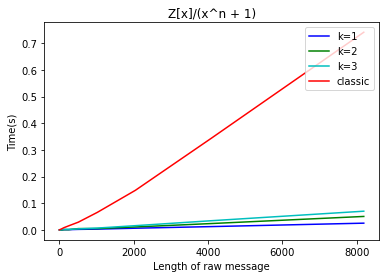

In [10]:
plt.plot(length, time_proposal1, 'b', label = 'k=1')
plt.plot(length, time_proposal2, 'g', label = 'k=2')
plt.plot(length, time_proposal3, 'c', label = 'k=3')
plt.plot(length, time_classic, 'r', label = 'classic')
plt.title("Z[x]/(x^n + 1)")
plt.xlabel("Length of raw message")
plt.ylabel("Time(s)")
plt.legend(loc = 'upper right')
plt.show()

In [ ]:
length = [] #length of raw message
time_GLS = []
time_SLS = []
time_RFR = []
for i in range(2, 14):
    l = 2**i
    print("length ", l, " starts")
    length.append(l)
    rm = range(l)
    gm, igm = generate_matrix(l)
    em = EV(rm)
    pt = encode(igm, em)
    extract1 = [1]
    rm_extract = [0]*l
    for i in extract:
        rm_extract[i] = 1
    em_extract = EV(rm_extract)
    pt_extract = encode(igm, em_extract)
    omega = np.exp(1j*np.pi/n)
    omega_inv = np.exp(-1j*np.pi/n)
    
    #proposal (k=1)
    tmp1 = ESB(l, extract1)
    
    #GLS
    start_GLS = time.time()
    
    eval_pt1 = tmp1.GLS(pt)
    
    end_GLS = time.time()
    
    time_GLS.append(end_GLS - start_GLS)
    
    #SLS
    start_SLS = time.time()
    
    result1 = tmp1.SLS(eval_pt1)
    
    end_SLS = time.time()
    
    time_SLS.append(end_SLS-start_SLS)
    
    #RFR   
    start_RFR = time.time()
    
    pt_prime1 = tmp1.RFR(result1)
    
    end_RFR = time.time()

    time_RFR.append(end_RFR-start_RFR)
    
    
print("end")

length  4  starts
length  8  starts
length  16  starts
length  32  starts
length  64  starts
length  128  starts
length  256  starts
length  512  starts
length  1024  starts
length  2048  starts
length  4096  starts
length  8192  starts
length  16384  starts


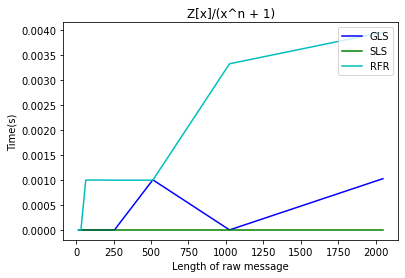

In [125]:
plt.plot(length, time_GLS, 'b', label = 'GLS')
plt.plot(length, time_SLS, 'g', label = 'SLS')
plt.plot(length, time_RFR, 'c', label = 'RFR')
plt.title("Z[x]/(x^n + 1)")
plt.xlabel("Length of raw message")
plt.ylabel("Time(s)")
plt.legend(loc = 'upper right')
plt.show()

In [28]:
length = [] #length of raw message
time_proposal1 = []
time_proposal2 = []
time_proposal3 = []
time_proposal4 = []
time_proposal5 = []
time_classic = []
for i in range(4, 15):
    l = 2**i
    print("length ", l, " starts")
    length.append(l)
    rm = range(l)
    gm, igm = generate_matrix(l)
    em = EV(rm)
    pt = encode(igm, em)
    extract1 = [1]
    rm_extract = [0]*l
    for i in extract1:
        rm_extract[i] = 1
    em_extract = EV(rm_extract)
    pt_extract = encode(igm, em_extract)
    psi_vector, inverse_vector = find_psi_vec(l)
    
    #proposal (k=1)
    tmp1 = ESB(l, extract1)
    
    start_proposal1 = time.time()
    
    eval_pt1 = tmp1.GLS(pt)
    result1 = tmp1.SLS(eval_pt1)
    pt_prime1 = tmp1.RFR(result1)
    
    end_proposal1 = time.time()

    time_proposal1.append(end_proposal1-start_proposal1)
    
    #proposal (k=2)
    extract2 = [1,2]
    tmp2 = ESB(l, extract2)
    
    start_proposal2 = time.time()
    
    eval_pt2 = tmp2.GLS(pt)
    result2 = tmp2.SLS(eval_pt2)
    pt_prime2 = tmp2.RFR(result2)
    
    end_proposal2 = time.time()

    time_proposal2.append(end_proposal2-start_proposal2)
    
    #proposal (k=3)
    extract3 = [1,2,3]
    tmp3 = ESB(l, extract3)
    
    start_proposal3 = time.time()
    
    eval_pt3 = tmp3.GLS(pt)
    result3 = tmp3.SLS(eval_pt3)
    pt_prime3 = tmp3.RFR(result3)
    
    end_proposal3 = time.time()

    time_proposal3.append(end_proposal3-start_proposal3)
    
    #proposal (k=4)
    extract4 = [1,2,3,4]
    tmp4 = ESB(l, extract4)
    
    start_proposal4 = time.time()
    
    eval_pt4 = tmp4.GLS(pt)
    result4 = tmp4.SLS(eval_pt4)
    pt_prime4 = tmp4.RFR(result4)
    
    end_proposal4 = time.time()

    time_proposal4.append(end_proposal4-start_proposal4)
    
    #proposal (k=5)
    extract5 = [1,2,3,4,5]
    tmp5 = ESB(l, extract5)
    
    start_proposal5 = time.time()
    
    eval_pt5 = tmp5.GLS(pt)
    result5 = tmp5.SLS(eval_pt5)
    pt_prime5 = tmp5.RFR(result5)
    
    end_proposal5 = time.time()

    time_proposal5.append(end_proposal5-start_proposal5)
    
    #Classic
    start_classic = time.time()
    
    pt_conv = CTfft(pt, psi_vector)
    pt_extract_conv = CTfft(pt_extract, psi_vector)
    result2_conv = [0]*(2*l)
    for i in range(2*l):
        result2_conv[i] = pt_conv[i]*pt_extract_conv[i]
    result2 = GSifft(result2_conv, inverse_vector)
    
    end_classic = time.time()
    
    time_classic.append(end_classic - start_classic)
    
    
print("end")

length  16  starts
length  32  starts
length  64  starts
length  128  starts
length  256  starts
length  512  starts
length  1024  starts
length  2048  starts
length  4096  starts
length  8192  starts
length  16384  starts


MemoryError: Unable to allocate 16.0 GiB for an array with shape (32768, 32768) and data type complex128

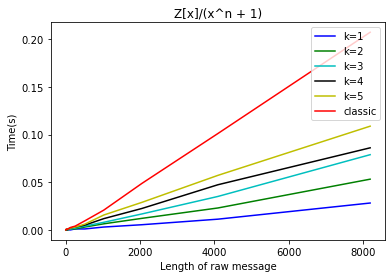

In [26]:
plt.plot(length, time_proposal1, 'b', label = 'k=1')
plt.plot(length, time_proposal2, 'g', label = 'k=2')
plt.plot(length, time_proposal3, 'c', label = 'k=3')
plt.plot(length, time_proposal4, 'k', label = 'k=4')
plt.plot(length, time_proposal5, 'y', label = 'k=5')
plt.plot(length, time_classic, 'r', label = 'classic')
plt.title("Z[x]/(x^n + 1)")
plt.xlabel("Length of raw message")
plt.ylabel("Time(s)")
plt.legend(loc = 'upper right')
plt.show()

In [27]:
print(time_proposal5, time_classic, sep='\n')

[0.0, 0.0, 0.0004973411560058594, 0.0009965896606445312, 0.0009968280792236328, 0.0019927024841308594, 0.002993345260620117, 0.005980253219604492, 0.01561737060546875, 0.02887725830078125, 0.05726146697998047, 0.1088860034942627]
[0.0, 0.0, 0.000537872314453125, 0.0009963512420654297, 0.0009958744049072266, 0.002540111541748047, 0.003983259201049805, 0.009448766708374023, 0.02072906494140625, 0.04872870445251465, 0.10118460655212402, 0.2074892520904541]
